In [24]:
# Qusetion 1: Model training 

import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Read X,Y traces into pandas DataFrames named X,Y
X=pd.read_csv('X.csv')
Y=pd.read_csv('Y.csv')

Y['meet_SLA']=Y['DispFrames']>=18
sum=Y['meet_SLA']
Y['meet_SLA']=Y['meet_SLA']*1
XY = pd.concat([X.iloc[:,1:10], Y['meet_SLA'], Y['DispFrames']], axis=1)

# Split XY into training set and test set
train, test = train_test_split(XY, test_size = 0.3)
X_train = train.iloc[:,0:9]; X_test = test.iloc[:,0:9]
Y_train = train.iloc[:,9]; Y_test = test.iloc[:,9]
                
#train the model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, Y_train)


#ptint the model coefficients
np.set_printoptions(precision=2)
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)

Coefficients: [[-2.66e-02 -1.03e-02  3.54e-06 -6.80e-04  3.50e-03  5.91e-03 -3.11e-05
   5.58e-04 -8.51e-03]]
Intercept: [3.85e-05]


[[450  42]
 [ 44 544]]
classification error is 0.080 


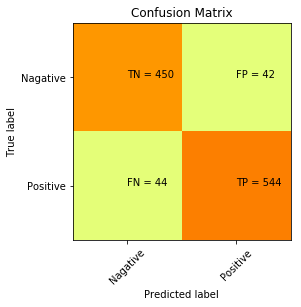

In [18]:
# Question 2: compute the classidication error 

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Y_pred=logreg.predict(X_test)
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

#compute error
ERR=1-(cm[0,0]+cm[1,1])/float(Y_test.count())
print("classification error is %.3f "%ERR)

#plot
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Wistia)
classNames=['Nagative','Positive']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [19]:
#question 3

#compute p
p=Y_train[Y_train==1].count()/float(Y_train.count())
print('the fraction of Y values which conform with the SLA on the training set is %.3f' %p)

#compute the correct prediction
true_count=Y_test[Y_test==1].count()
false_count=Y_test[Y_test==0].count()
C_pre= true_count * p + false_count * (1-p)

#compute the classification error 
C_err=1- C_pre/float(Y_test.count())
print('the classification error for the naive classifier on the test set is %.3f' %C_err)

the fraction of Y values that comform with the SLA on the training set is 0.527
the classfication error for the naive classfier on the test set is 0.498


In [20]:
#question 4
Y_linear_train = train.iloc[:,10]
X_linear_train=X_train
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(X_linear_train, Y_linear_train)

Y_linear_pre=pd.Series(regr.predict(X_test))
Y_linear_SLA=Y_linear_pre>=18 
Y_linear_SLA=Y_linear_SLA*1

#calculate confusion matrix
cm=confusion_matrix(Y_test,Y_linear_SLA)
print(cm)

#calculate error
ERR=1-(cm[0,0]+cm[1,1])/float(Y_test.count())
print("classification error of linear model is %.3f "%ERR)

[[448  44]
 [ 37 551]]
classification error of linear model is 0.075 
